# What is the frequency of twitter mentions for Canadian Political Leaders?

Recreate final project of DataCamp's ["Importing Data with Python (Part 2)"](https://www.datacamp.com/courses/python-data-science-toolbox-part-2)

In [8]:
# Import packages
import tweepy  # used to stream,filter tweets
import json  # api results will be in json form
import pandas as pd  # to count and plot results need to convert api results to dataframe
import matplotlib.pyplot as plt  # using this package to plot results
import numpy as np  # used to format axes of plot

## Pass OAuth details to tweepy's OAuth handler

In [2]:
# Store OAuth authentication credentials in relevant variables
access_token = "hidden"
access_token_secret = "hidden"
consumer_key = "hidden"
consumer_secret = "hidden"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

## Define a MyStreamListener class
This will listen to 100 tweets. Source: https://gist.github.com/hugobowne/18f1c0c0709ed1a52dc5bcd462ac69f4

In [36]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 500:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

## Initialize, Create, Filter and Save

In [37]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track = ['justin trudeau','andrew scheer','elizabeth may','jagmeet singh'])

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

## Create Dictionary of Results

In [38]:
# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


## Format text and language into a DataFrame

In [39]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @globeandmail: Supporters of former Conserv...   en
1  RT @9291Motomom: Remember this Canada!! Canadi...   en
2  RT @daleethompson: How do you even choose who’...   en
3  RT @Worried_Canuck: These people have lost it....   en
4  RT @globeandmail: Supporters of former Conserv...   en


## Count instances

This method will search each tweet for Political Leader names.

In [40]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

Take a tally of Political Leader mentions.

In [41]:
# Initialize list to store tweet counts
[trudeau, scheer, may, singh] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    trudeau += word_in_text('trudeau', row['text'])
    scheer += word_in_text('scheer', row['text'])
    may += word_in_text('may', row['text'])
    singh += word_in_text('singh', row['text'])

## Plot Results

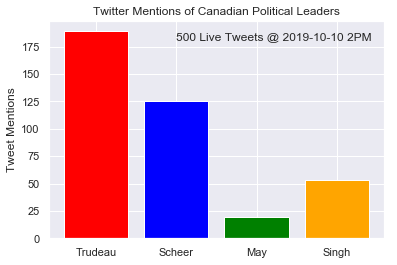

In [47]:
# Used to format x-axes
bars = ('Trudeau', 'Scheer', 'May', 'Singh')
y_pos = np.arange(len(bars))

# Create the graph
plt.bar(y_pos, [trudeau, scheer, may, singh], color=['red', 'blue', 'green', 'orange'])
plt.xticks(y_pos, bars)

# Add title, y-axis label and info about data collection
plt.title('Twitter Mentions of Canadian Political Leaders')
plt.ylabel('Tweet Mentions')
plt.text(x = y_pos[1], y = 180, s = '500 Live Tweets @ 2019-10-10 2PM')

plt.show()